In [1]:
# Imports
import sys
import os
import json
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# MEME on p53 empirical alignment
#path = "../MEME"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".MEME.json")]
#output_header = "p53_Treemmer_MEME_AllBranches_PositiveSites.png"

# MEME on p53 empirical alignment - Internal branches only
#path = "../subsampled_fasta_keepAligned_Results"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".MEME_internal.json")]
#output_header = "p53_Treemmer_MEME_InternalBranches_PositiveSites.png"    

# MEME - KeepAligned    
#path = "../subsampled_fasta_keepAligned_Results"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".MEME.json")]
#output_header = "p53_Treemmer_KeepAligned_MEME_AllBranches_PositiveSites.png" 

# MEME Internal - KeepAligned    
#path = "../subsampled_fasta_keepAligned_Results"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".MEME_internal.json")]
#output_header = "p53_Treemmer_KeepAligned_MEME_InternalBranches_PositiveSites.png" 

# Sims - Uniform
# MEME
#path = "../../Sims/subsampled_fasta/o01"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".MEME.json")]
#output_header = "Sims_Uniform_omega01_Treemmer_MEME_AllBranches_PositiveSites.png" 

#path = "../../Sims/subsampled_fasta/o1"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".MEME.json")]
#output_header = "Sims_Uniform_omega1_Treemmer_MEME_AllBranches_PositiveSites.png" 

#path = "../../Sims/subsampled_fasta/o10"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".MEME.json")]
#output_header = "Sims_Uniform_omega10_Treemmer_MEME_AllBranches_PositiveSites.png" 

## Sims - GammaDistributed
# Gamma distributed sims
#path = "../../Sims/GammaDistributed/subsampled_fasta/o01"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".MEME.json")]
#output_header = "Sims_GammaDistributed_omega01_Treemmer_MEME_AllBranches_PositiveSites.png" 

#path = "../../Sims/GammaDistributed/subsampled_fasta/o1"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".MEME.json")]
#output_header = "Sims_GammaDistributed_omega1_Treemmer_MEME_AllBranches_PositiveSites.png" 

#path = "../../Sims/GammaDistributed/subsampled_fasta/o10"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".MEME.json")]
#output_header = "Sims_GammaDistributed_omega10_Treemmer_MEME_AllBranches_PositiveSites.png" 

# MEME on Subsampling_with_TN93-Algo
#path = "../../Test_TN93_algo_subsamples"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".MEME.json")]
#output_header = "../../Plots/BDNF_TN93Algo_MEME_AllBranches.png"

# MEME on Subsampling_with_TN93-Algo
#path = "../../Test_TN93_algo_subsamples"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".MEME_internal.json")]
#output_header = "../../Plots/BDNF_TN93Algo_MEME_InternalBranches.png"

# IAV ----------------------------------------------
#path = "../../Test_TN93_algo_subsamples"
path = os.path.join("..", "Results", "IAV_Chen")

#files = [path + "/" + f.name for f in os.scandir(path) if f.name.endswith(".MEME.json")]
files = [os.path.join(path, f.name) for f in os.scandir(path) if f.name.endswith(".MEME.json")]
#output_header = "../../Plots/BDNF_TN93Algo_MEME_InternalBranches.png"
output_header = "IAV_Chen"

files

['..\\Results\\IAV_Chen\\IAV_Chen.fasta.10.subsampled.fasta.MEME.json',
 '..\\Results\\IAV_Chen\\IAV_Chen.fasta.11.subsampled.fasta.MEME.json',
 '..\\Results\\IAV_Chen\\IAV_Chen.fasta.12.subsampled.fasta.MEME.json',
 '..\\Results\\IAV_Chen\\IAV_Chen.fasta.13.subsampled.fasta.MEME.json',
 '..\\Results\\IAV_Chen\\IAV_Chen.fasta.14.subsampled.fasta.MEME.json',
 '..\\Results\\IAV_Chen\\IAV_Chen.fasta.15.subsampled.fasta.MEME.json',
 '..\\Results\\IAV_Chen\\IAV_Chen.fasta.16.subsampled.fasta.MEME.json',
 '..\\Results\\IAV_Chen\\IAV_Chen.fasta.17.subsampled.fasta.MEME.json',
 '..\\Results\\IAV_Chen\\IAV_Chen.fasta.18.subsampled.fasta.MEME.json',
 '..\\Results\\IAV_Chen\\IAV_Chen.fasta.19.subsampled.fasta.MEME.json',
 '..\\Results\\IAV_Chen\\IAV_Chen.fasta.20.subsampled.fasta.MEME.json',
 '..\\Results\\IAV_Chen\\IAV_Chen.fasta.21.subsampled.fasta.MEME.json',
 '..\\Results\\IAV_Chen\\IAV_Chen.fasta.22.subsampled.fasta.MEME.json',
 '..\\Results\\IAV_Chen\\IAV_Chen.fasta.23.subsampled.fasta.MEME

In [3]:
data_dict = {}
pvalue_threshold = 0.1

def return_positive_sites_count(MLE):
    global pvalue_threshold
    data_list = []
    count = 0
    for n, item in enumerate(MLE):
        if float(item[6] < pvalue_threshold): 
            count += 1
            site = n + 1
            data_list.append(site) 
        #end if
    #end for
    return count, data_list
#end method

# Main -------------------------------------------------
count = 1
for filename in files:
    if os.stat(filename).st_size == 0: 
        continue
    #end if
    with open(filename, "r") as fh:
        try:
            json_data = json.load(fh)
        except:
            continue
        #end try
    #end with
    num_seqs = json_data["input"]["number of sequences"]
    num_sites = json_data["input"]["number of sites"]
    # Here
    #print(filename.split("/")[-1], num_seqs, num_sites)
    
    positive_sites, positive_sites_list = return_positive_sites_count(json_data["MLE"]["content"]["0"])
    
    # p-values
    p_values_list = []
    
    for item in json_data["MLE"]["content"]["0"]:
        p_value = item[6] # Updated for MEME format.
        p_values_list.append(p_value)
    #end for
    
    """
    data_dict[count] = {"Filename":filename.split("/")[-1],
                        "num_seqs": num_seqs, 
                        "num_sites" :num_sites,
                        "negative_sites": negative_sites, 
                        "positive_sites" : positive_sites,
                        "positive_sites_list" : positive_sites_list,
                        "negative_sites_list" : negative_sites_list,
                        "p_values":p_values_list}
    """
    data_dict[count] = {"Filename":os.path.basename(filename),
                        "num_seqs": num_seqs, 
                        "num_sites" :num_sites,
                        "positive_sites" : positive_sites,
                        "positive_sites_list" : positive_sites_list,
                        "p_values":p_values_list}
    
    
    count += 1
#end for

In [4]:
df = pd.DataFrame.from_dict(data_dict, orient='index')
df

,Filename,num_seqs,num_sites,positive_sites,positive_sites_list,p_values
1,IAV_Chen.fasta.10.subsampled.fasta.MEME.json,10,329,2,"[159, 226]","[0.6666666666666666, 0.2401414094008337, 0.666..."
2,IAV_Chen.fasta.11.subsampled.fasta.MEME.json,11,329,2,"[159, 226]","[0.6666666666666666, 0.2379265949827311, 0.666..."
3,IAV_Chen.fasta.12.subsampled.fasta.MEME.json,12,329,2,"[159, 226]","[0.6666666666666666, 0.2372342055576119, 0.666..."
4,IAV_Chen.fasta.13.subsampled.fasta.MEME.json,13,329,4,"[133, 135, 159, 226]","[0.6666666666666666, 0.2404816208460874, 0.666..."
5,IAV_Chen.fasta.14.subsampled.fasta.MEME.json,14,329,4,"[133, 135, 159, 226]","[0.6666666666666666, 0.2388467794846642, 0.666..."
...,...,...,...,...,...,...
79,IAV_Chen.fasta.82.subsampled.fasta.MEME.json,82,329,8,"[121, 137, 138, 155, 157, 159, 193, 226]","[0.6666666666666666, 0.6666666666666666, 0.557..."
80,IAV_Chen.fasta.83.subsampled.fasta.MEME.json,83,329,8,"[121, 137, 138, 155, 157, 159, 193, 226]","[0.6666666666666666, 0.6561573547483899, 0.557..."
81,IAV_Chen.fasta.84.subsampled.fasta.MEME.json,84,329,8,"[121, 137, 138, 155, 157, 159, 193, 226]","[0.6666666666666666, 0.6030172364569126, 0.557..."
82,IAV_Chen.fasta.85.subsampled.fasta.MEME.json,85,329,8,"[121, 137, 138, 155, 157, 159, 193, 226]","[0.6666666666666666, 0.6028681518558997, 0.557..."


In [5]:
df.sort_values(by=['num_seqs'], ascending=False, inplace=True)
df

,Filename,num_seqs,num_sites,positive_sites,positive_sites_list,p_values
82,IAV_Chen.fasta.85.subsampled.fasta.MEME.json,85,329,8,"[121, 137, 138, 155, 157, 159, 193, 226]","[0.6666666666666666, 0.6028681518558997, 0.557..."
81,IAV_Chen.fasta.84.subsampled.fasta.MEME.json,84,329,8,"[121, 137, 138, 155, 157, 159, 193, 226]","[0.6666666666666666, 0.6030172364569126, 0.557..."
80,IAV_Chen.fasta.83.subsampled.fasta.MEME.json,83,329,8,"[121, 137, 138, 155, 157, 159, 193, 226]","[0.6666666666666666, 0.6561573547483899, 0.557..."
79,IAV_Chen.fasta.82.subsampled.fasta.MEME.json,82,329,8,"[121, 137, 138, 155, 157, 159, 193, 226]","[0.6666666666666666, 0.6666666666666666, 0.557..."
78,IAV_Chen.fasta.81.subsampled.fasta.MEME.json,81,329,8,"[121, 137, 138, 155, 157, 159, 193, 226]","[0.6666666666666666, 0.6554875585397416, 0.557..."
...,...,...,...,...,...,...
65,IAV_Chen.fasta.7.subsampled.fasta.MEME.json,7,329,4,"[135, 159, 182, 226]","[0.6666666666666666, 0.2911961626150444, 0.556..."
54,IAV_Chen.fasta.6.subsampled.fasta.MEME.json,6,329,3,"[135, 159, 226]","[0.6666666666666666, 0.3046327492589629, 0.531..."
43,IAV_Chen.fasta.5.subsampled.fasta.MEME.json,5,329,4,"[3, 135, 159, 226]","[0.6666666666666666, 0.3151370379750975, 0.017..."
32,IAV_Chen.fasta.4.subsampled.fasta.MEME.json,4,329,3,"[3, 135, 182]","[0.6666666666666666, 0.3498503626330315, 0.032..."


In [8]:
def plot_df(df, y):
    global output_header
    plt.figure()
    df.sort_values(by=['num_seqs'], ascending=False).plot(kind="line", lw=4, y=y, x="num_seqs", markerfacecolor='black', marker='o', markersize=6, rot=90, figsize=(12,12))
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('Number of Sequences',  fontsize=24)
    plt.ylabel('Number of Sites', fontsize=24)
    plt.savefig(output_header)
    plt.show()
#end method


## Plots

<Figure size 432x288 with 0 Axes>

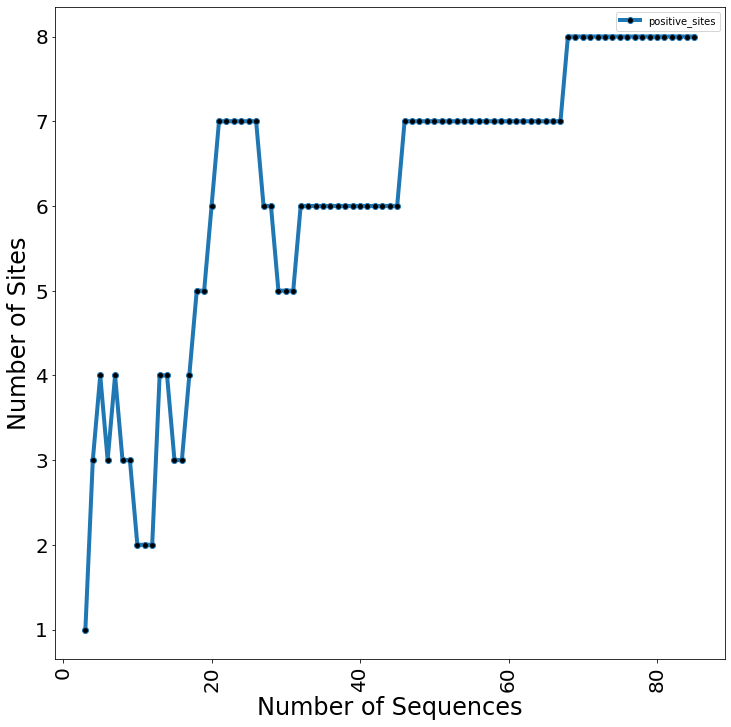

In [9]:
plot_df(df, "positive_sites")

In [10]:
# Follow the sites

In [11]:
# Need to transpose the data.
nd_dict = {}
count = 1

for index, row in df.iterrows():
    #print(row['c1'], row['c2'])
    #print(row["positive_sites_list"])
    for item in row["positive_sites_list"]:
        #print(item, row["Filename"])
        nd_dict[count] = {"Filename": row["Filename"],
                         "num_seqs": row["num_seqs"],
                         "PositiveSite": item}
        count += 1
    #end for
#end for


In [12]:
#nd_dict
df2 = pd.DataFrame.from_dict(nd_dict, orient='index')
df2.sort_values(by=['PositiveSite'], ascending=True, inplace=True)
df2 = df2.reset_index(drop=True)
df2.index += 1
a = set(df2["PositiveSite"])
#df2['PositiveSite'] = df2['PositiveSite'].astype(str)
df2

,Filename,num_seqs,PositiveSite
1,IAV_Chen.fasta.4.subsampled.fasta.MEME.json,4,3
2,IAV_Chen.fasta.5.subsampled.fasta.MEME.json,5,3
3,IAV_Chen.fasta.85.subsampled.fasta.MEME.json,85,121
4,IAV_Chen.fasta.55.subsampled.fasta.MEME.json,55,121
5,IAV_Chen.fasta.54.subsampled.fasta.MEME.json,54,121
...,...,...,...
508,IAV_Chen.fasta.40.subsampled.fasta.MEME.json,40,226
509,IAV_Chen.fasta.57.subsampled.fasta.MEME.json,57,226
510,IAV_Chen.fasta.32.subsampled.fasta.MEME.json,32,226
511,IAV_Chen.fasta.60.subsampled.fasta.MEME.json,60,226
